# Getting started - Requirements
Python (🐍):  This assumes that you have a python environment installed. If you haven't, we recommend installing [Anaconda](https://docs.anaconda.com/anaconda/install/).

FPsim (♀️): This tutorial uses [FPsim v2.0](https://github.com/fpsim/fpsim/tree/rc2.0-methodtime). 

To install, you first need to clone or download the a copy of the source code from https://github.com/fpsim/fpsim/
 
```
git clone -b rc2.0-methodtime --single-branch https://github.com/fpsim/fpsim.git
cd fpsim
pip install -e .
```

If it worked, you should be able to import fpsim with `import fpsim as fp`.

<div class="alert alert-info">
    
An interactive version of this notebook is available on [Google Colab](https://colab.research.google.com/github/fpsim/fpsim/blob/main/docs/tutorials/T2_intro_to_new_features.ipynb?install=fpsim) or [Binder](https://mybinder.org/v2/gh/fpsim/fpsim/HEAD?labpath=docs%2Ftutorials%2FT2_intro_to_new_features.ipynb).
    
</div>

# Understanding contraceptive use 

There are many factors that influence women's decisions about contraceptive use. FPsim 2.0 brings enhancements that incorporate these factors. It also provides users with new flexibility for defining their own logic for how women make contraceptive decisions. We will illustrate some of this functionality in this tutorial.

First, some terminology. All of the logic for how women make contraception decisions is kept within a `ContraceptiveChoice` module. The default `ContraceptiveChoice` module within FPsim is `StandardChoice`. There is also a more detailed `EmpoweredChoice` module in an [analysis repository](https://github.com/fpsim/kenya_empowerment).

## Standard contraceptive choice

This is the default option for how contraceptive decisions are made in FPsim. Under this option, a woman's decision about whether to use contraception depends on her age, whether or not she has ever used contraception before, her level of education, her wealth quintile, her parity, and her geographical setting (urban/rural). Data on these variables is available from the Demographic and Health Survey (DHS). 

The snippet below illustrates how to set up and run a simulation using the `StandardChoice` module.

In [1]:
# Import FPsim and define the baseline parameters
import fpsim as fp
location = 'kenya'
pars = dict(location=location, n_agents=500, start_year=1980, end_year=2020, seed=1, verbose=1)

# Define the contraceptive choice module and the education module.
choice = fp.StandardChoice(location=location)
edu = fp.Education(location=location)

# Make and run sim
s = fp.Sim(pars, contraception_module=choice, education_module=edu)
s.run()

C:\github\fpsimtostarsim\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initializing sim with 500 agents


———————————————————————————————————
  Running 1980.0 ( 0/481) (0.00 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.1 ( 1/481) (0.01 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.2 ( 2/481) (0.02 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.2 ( 3/481) (0.02 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.3 ( 4/481) (0.04 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.4 ( 5/481) (0.04 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.5 ( 6/481) (0.05 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.6 ( 7/481) (0.06 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.7 ( 8/481) (0.07 s) 
—————

Sim(n=500; 1980—2020)

## The SimpleChoice and RandomChoice modules

Whilst the `StandardChoice` module will be appropriate for most analyses, we have also included two simpler versions, `SimpleChoice` and `RandomChoice`. 

In the `SimpleChoice` module, a woman's decision about whether to use contraception only depends on her age and whether or not she has ever used contraception before. Compared to the `StandardChoice` module, the `SimpleChoice` module disregards the influence of women's education, wealth, parity, and urban/rural status on her contraceptive decisions.

The `RandomChoice` module is included only for testing purposes. In this module, women choose contraception at random. This module can be useful for sanity checking that the more realistic modules behave as expected.

It is recommended that use of the `SimpleChoice` and `RandomChoice` modules is reserved for testing purposes, as the `StandardChoice` captures more of the factors relevant for contraceptive decision making. Nevertheless, the example below shows how to use the `SimpleChoice` module. This example can also be considered as a template for anyone wishing to define their own contraceptive choice module.

Initializing sim with 500 agents


———————————————————————————————————
  Running 1980.0 ( 0/481) (0.00 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.1 ( 1/481) (0.01 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.2 ( 2/481) (0.02 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.2 ( 3/481) (0.02 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.3 ( 4/481) (0.03 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.4 ( 5/481) (0.04 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.5 ( 6/481) (0.05 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.6 ( 7/481) (0.06 s) 
———————————————————————————————————



———————————————————————————————————
  Running 1980.7 ( 8/481) (0.07 s) 
—————

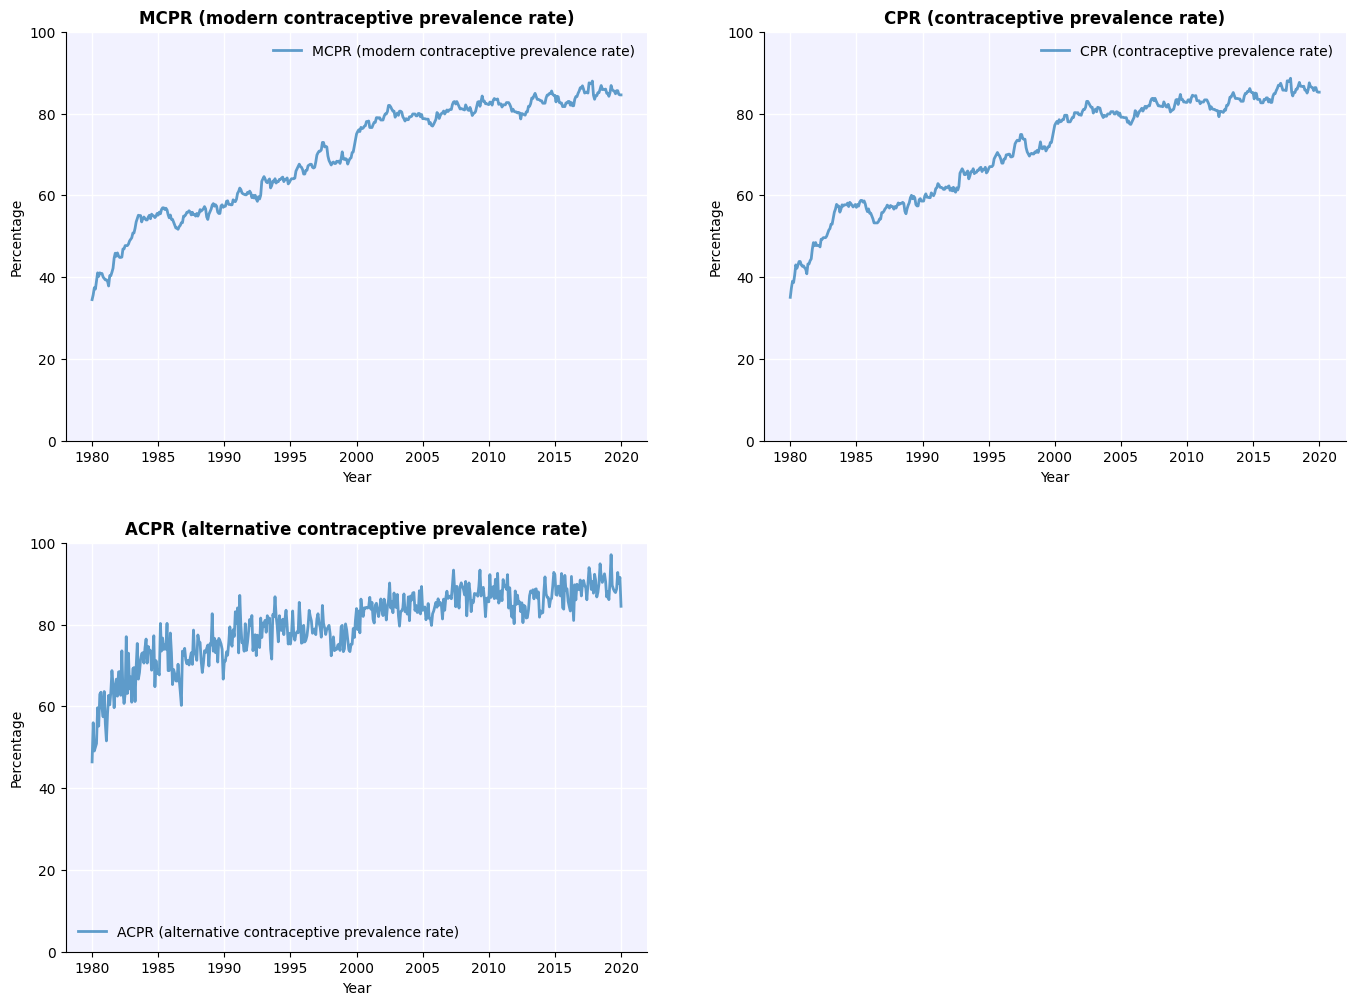

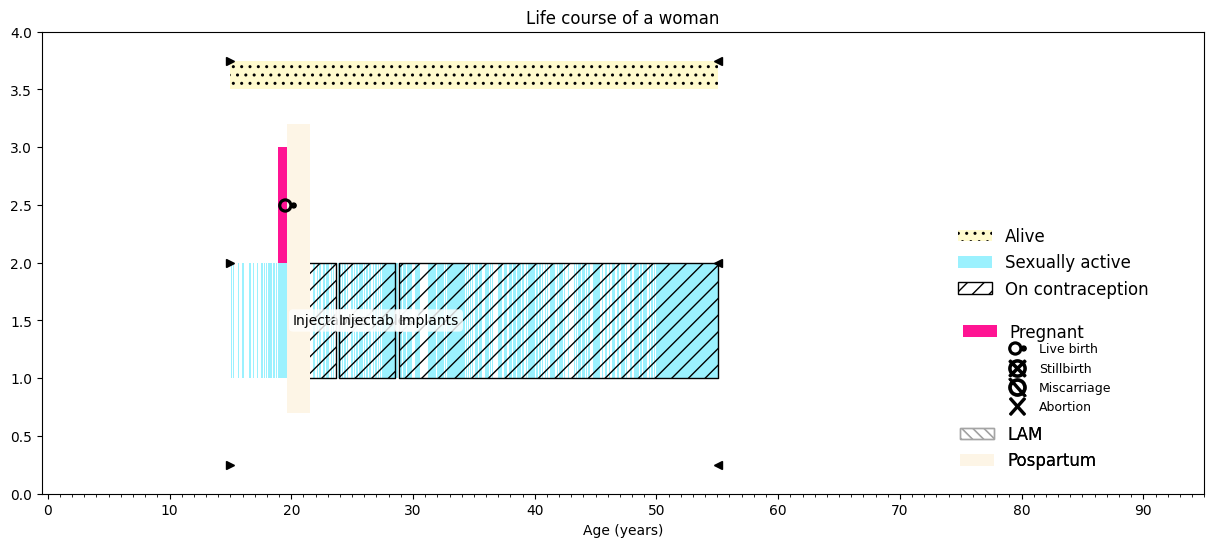

In [3]:
method_choice = fp.SimpleChoice(location=location)
sim = fp.Sim(pars=pars, contraception_module=method_choice, analyzers=fp.lifeof_recorder())
sim.run()

_ = sim.plot(to_plot='cpr');
_ = sim.analyzers[0].plot(index=1); # plot the life events of one woman

NOTE: FPsim 2.0 was specifically designed to support the analyses in the related [analysis repository](https://github.com/fpsim/kenya_empowerment), which address two evolutions in the current family planning research landscape: centering women’s intentions and preferences; and considering the broader impact of family planning on women’s empowerment. This repository also contains more details on how to define a custom contraceptive choice module.

In the next tutorial, you wil learn how to define and run an intervention.